In [0]:
import pandas as pd #biblioteca para ciência de dados
import numpy as np #biblioteca para matrizes e operações matemáticas
from numpy import linalg as LA
import seaborn as sns #biblioteca para vizulização dos dados
import matplotlib.pyplot as plt #biblioteca para vizulização dos dados
from sklearn.decomposition import PCA #biblioteca para ciência de dados de onde importamos PCA
from sklearn.preprocessing import MinMaxScaler

In [0]:
sheets_url = 'https://raw.githubusercontent.com/gabrielMessias/MQAAE/master/Autismo.txt?token=AKS3G7RFCBEUSI5XVZNTI2K5O2JCK'
#o dataset está nesse link, é o dataset sobre o Autismo que estava no tidia
df = pd.read_csv(sheets_url)
#utiliza o metodo read_csv do pandas, analisando os dados de sheets_url

In [3]:
df
#exibe os dados do dataset

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry,used_app_before,result,age_desc,relation,ClassASD
0,1,1,0,0,1,1,0,1,0,0,6,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6,m,?,no,no,Jordan,yes,5,'4-11 years',?,NO
3,0,1,0,0,1,1,0,0,0,1,5,f,?,yes,no,Jordan,no,4,'4-11 years',?,NO
4,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES
5,0,0,1,0,1,1,0,1,0,1,4,m,?,no,yes,Egypt,no,5,'4-11 years',?,NO
6,1,0,1,1,1,1,0,1,0,1,5,m,White-European,no,no,'United Kingdom',no,7,'4-11 years',Parent,YES
7,1,1,1,1,1,1,1,1,0,0,5,f,'Middle Eastern ',no,no,Bahrain,no,8,'4-11 years',Parent,YES
8,1,1,1,1,1,1,1,0,0,0,11,f,'Middle Eastern ',no,no,Bahrain,no,7,'4-11 years',Parent,YES
9,0,0,1,1,1,0,1,1,0,0,11,f,?,no,yes,Austria,no,5,'4-11 years',?,NO


In [4]:
df.isnull().sum()
#verifica se há algum dado nulo, pois se houver, teríamos que tratá-los
#Após a verificação, vimos que no nosso dataset não há dado nulo

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry             0
used_app_before    0
result             0
age_desc           0
relation           0
ClassASD           0
dtype: int64

In [0]:
df.replace('NO', 0, inplace = True)
df.replace('YES', 1, inplace = True)
#O método PCA da biblioteca sklearn aceita apenas dados numéricos, então
#transformamos esses dados em números inteiros, em que 0 significa
#"não possui autismo" e 1 significa "possui autismo"

In [0]:
pca_1 = PCA(n_components = 2)
pca_2 = PCA(n_components = 1)

#pca_3 = PCA(n_components = 3)
#pca_4 = PCA(0.90)#0 - 1(variancia que voce quer explicar)
df_numerics = df[['A1_Score', 'A2_Score', 'A3_Score',	'A4_Score',	'A5_Score',	'A6_Score',	'A7_Score',	'A8_Score',	'A9_Score', 'A10_Score']].copy()

numerics_transformed_1 = pca_1.fit_transform(df_numerics)
numerics_transformed_2 = pca_2.fit_transform(df_numerics)
#numerics_transformed_3 = pca_3.fit_transform(df_numerics)
#numerics_transformed_4 = pca_4.fit_transform(df_numerics)

Na célula acima, criamos 2 variáveis para a realização do teste de PCA:
pca_1 fará a redução para 2 componentes e pca_2 para 1 componente.

A variável df_numerics é o novo dataframe, apenas com os teste de autismo (as principais features para designar se a pessoa está dentro do espectro do autismo -ASD)

numerics_transformed_1 é o novo dataframe com a aplicação do PCA, a partir do método fit_transform do objeto pca_1, o mesmo para numerics_transformed_2 e pca_2.



In [11]:
numerics_transformed_1
#exibição do novo dataframe, agora com o teste de PCA realizado

array([[ 0.4442193 ,  0.43251154],
       [ 0.4442193 ,  0.43251154],
       [ 0.50027784,  0.01820401],
       [ 0.821668  ,  0.52565517],
       [-1.15471974, -0.08330939],
       [ 0.30374439, -0.03940673],
       [-0.40916328,  0.26854957],
       [-0.46476033,  0.08467494],
       [-0.07813954,  0.28950393],
       [ 0.31495048, -0.68212052],
       [-0.2443311 , -0.92882832],
       [ 1.19923642,  0.32099766],
       [-0.9086842 , -0.15880284],
       [ 1.4205739 , -0.468269  ],
       [-1.15471974, -0.08330939],
       [-1.15471974, -0.08330939],
       [-1.00002191,  0.62340165],
       [ 1.66660944, -0.54376245],
       [-0.62104448, -0.77461139],
       [-0.56527013,  0.75519406],
       [-0.51289131,  0.15771152],
       [-0.13191551,  0.38985912],
       [ 0.95229276,  0.95754938],
       [ 0.00866975,  0.67018157],
       [-0.84391506,  0.13675716],
       [-0.1198013 , -0.81391293],
       [ 0.00957786,  0.1091233 ],
       [-1.15471974, -0.08330939],
       [ 0.5812645 ,

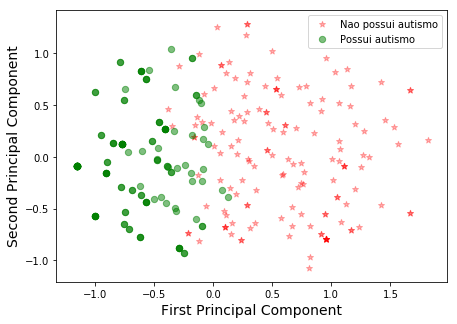

In [14]:
Xax=numerics_transformed_1[:,0]
Yax=numerics_transformed_1[:,1]

labels=df.ClassASD

cdict={0:'red',1:'green'}
labl={0:'Nao possui autismo', 1: 'Possui autismo'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}

fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
  ix=np.where(labels==l)
  ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40, label=labl[l],marker=marker[l],alpha=alpha[l])
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

#o codigo acima plota o grafico 2D

O código da célula acima tem o objetivo de plotar o nosso dataframe numerics_transformed_1, em que os eixos X e Y correspondem aos dois componentes do nosso dataframme.

O label é o componente ClassASD (0 para não possuir autismo e 1 para possuir autismo) do dataframe df.



In [0]:
test = pd.DataFrame(numerics_transformed_2, df.ClassASD).reset_index()
test.columns= ['Autism', 'Principal Component']

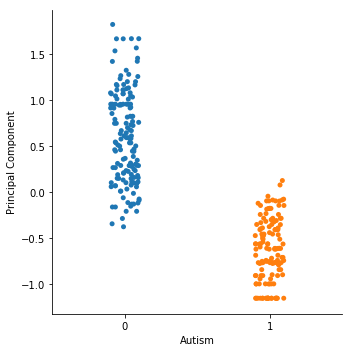

In [16]:
sns.catplot(x="Autism", y='Principal Component', data=test);